# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D but with dynamic learning rates
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [46]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Gradient descent in 1D

In [47]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

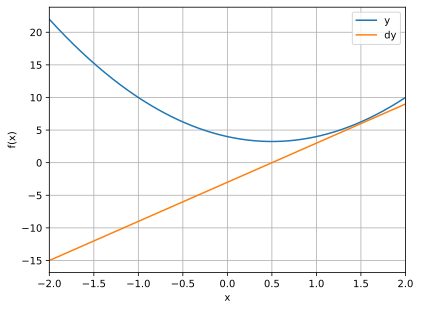

In [48]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

# Set up initial values

In [49]:
initial_localmin = np.random.choice(x,1)[0]
initial_training_epochs = 100

# Experiment 1: Classic gradient descent

In [50]:
# random starting point
localmin = initial_localmin
print("initial local min is", localmin)

# learning parameters
learning_rate = .1
training_epochs = initial_training_epochs
classic_model_params = np.zeros((training_epochs,3))

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  classic_model_params[i,:] = localmin, grad, learning_rate  # Ensure localmin is a scalar

print("final local min is", localmin)
print("we did it in", i, "epochs")
print("the training rate is", learning_rate)
print("the final gradient is", grad)


initial local min is 0.8279999999999998
final local min is 0.5
we did it in 99 epochs
the training rate is 0.1
the final gradient is 0.0


# Experiment 2: Stop learning when the change in the model parameters is less than a threshold

The idea here is to put a learning threshold and stop the learning process when the change in the model parameters is less than that threshold.

In [51]:
# random starting point
localmin = initial_localmin
print("initial local min is", localmin)

# learning parameters
learning_rate = .1
training_epochs = initial_training_epochs
learning_threshold = 1e-9
lt_modelparams = np.zeros((training_epochs,3))

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  new_localmin = localmin - learning_rate*grad
  lt_modelparams[i,:] = new_localmin, grad, learning_rate 
  if np.abs(new_localmin - localmin) < learning_threshold:
    localmin = new_localmin
    lt_modelparams = lt_modelparams[:i+1] # truncate the array
    break
  else:
    localmin = new_localmin

print("final local min is", localmin)
print("we did it in", i, "epochs")
print("the training rate is", learning_rate)

initial local min is 0.8279999999999998
final local min is 0.5000000005770237
we did it in 21 epochs
the training rate is 0.1


# Experiment 3: Stop when the derivate is nearly zero (threshold)

In [52]:
# random starting point
localmin = initial_localmin
print("initial local min is", localmin)

# learning parameters
training_epochs = initial_training_epochs
learning_rate = .1
derivate_threshold = 1e-5
dt_modelparams = np.zeros((training_epochs,3))

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  dt_modelparams[i,:] = localmin, grad, learning_rate
  if abs(grad) < derivate_threshold:
    dt_modelparams = dt_modelparams[:i+1] # truncate the array
    break

print("final local min is", localmin)
print("we did it in", i, "epochs")
print("the training rate is", learning_rate)

initial local min is 0.8279999999999998
final local min is 0.5000003521873183
we did it in 14 epochs
the training rate is 0.1


# Experiment 4: Changing the learning rate dynamically

In [53]:
localmin = initial_localmin
print("initial local min is", localmin)

# learning parameters
learning_rate = .08
training_epochs = initial_training_epochs
dlr_modelparams = np.zeros((training_epochs,3))

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)

  lr = learning_rate*np.abs(grad)

  localmin = localmin - lr*grad

  dlr_modelparams[i,:] = localmin, grad, lr

print("final local min is", localmin)
print("we did it in", i, "epochs")
print("the training rate is", learning_rate)

initial local min is 0.8279999999999998
final local min is 0.5028939622299493
we did it in 99 epochs
the training rate is 0.08


# Experiment 5: Time-based learning rate

In [54]:
localmin = initial_localmin
print("initial local min is", localmin)

# learning parameters
learning_rate = .1
training_epochs = initial_training_epochs
tlr_modelparams = np.zeros((training_epochs,3))

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)

  lr = learning_rate*(1-(i+1)/training_epochs) # linearly decreasing learning rate

  localmin = localmin - lr*grad

  tlr_modelparams[i,:] = localmin, grad, lr

print("final local min is", localmin)
print("we did it in", i, "epochs")
print("the training rate is", learning_rate)

initial local min is 0.8279999999999998
final local min is 0.5000000000000002
we did it in 99 epochs
the training rate is 0.1


# Plot the results

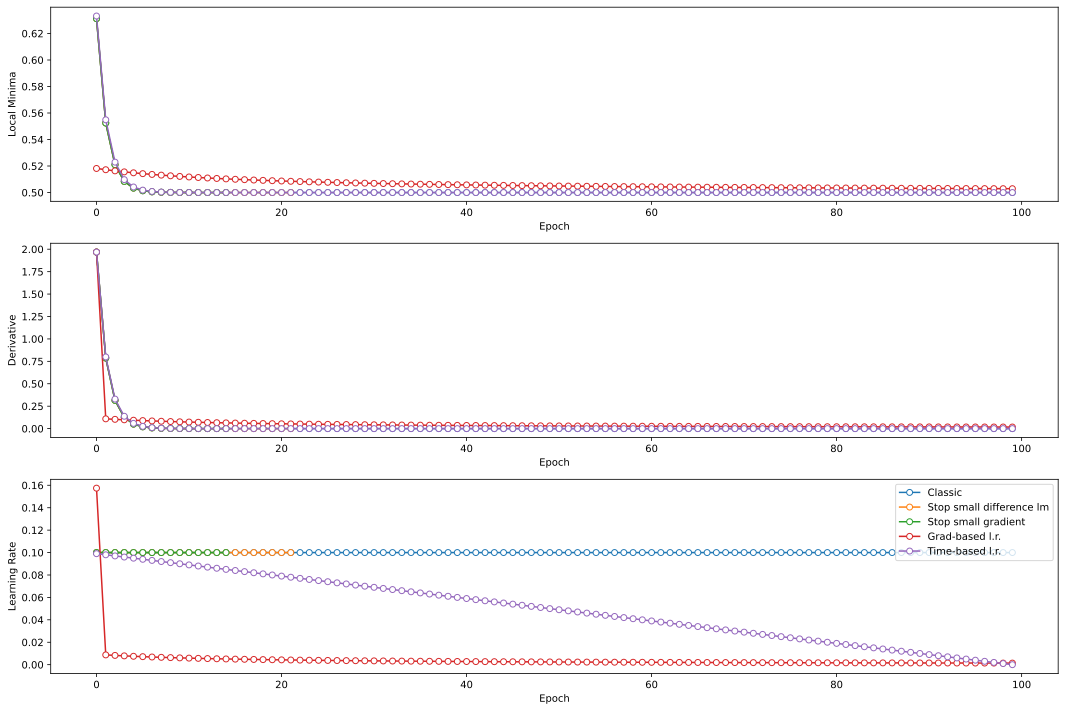

In [55]:
fix,ax = plt.subplots(3,1,figsize=(15,10))

# generate the plots 
for i in range(3):
    ax[i].plot(classic_model_params[:,i],'o-',markerfacecolor='w')
    ax[i].plot(lt_modelparams[:,i],'o-',markerfacecolor='w')
    ax[i].plot(dt_modelparams[:,i],'o-',markerfacecolor='w')
    ax[i].plot(dlr_modelparams[:,i],'o-',markerfacecolor='w')
    ax[i].plot(tlr_modelparams[:,i],'o-',markerfacecolor='w')
    ax[i].set_xlabel('Epoch')

ax[0].set_ylabel('Local Minima')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Classic','Stop small difference lm','Stop small gradient','Grad-based l.r.','Time-based l.r.'], loc='upper right')

plt.tight_layout()
plt.show()

# Additional explorations

In [56]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
# 